In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv("https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv")

5. Περαιτέρω αναζητήσεις, αναλύσεις και οπτικοποιήσεις των δεδομένων
Συνεχίστε τη ίδια διαδικασία για να θέσετε περαιτέρω ερωτήματα στα δεδομένα και να πάρετε περισσότερες απαντήσεις.

Μερικά ενδεικτικά ερωτήματα:

1.Υπάρχει σχέση μεταξύ της βαθμολογίας των ταινιών (star_rating) και του είδους των ταινιών (genre);

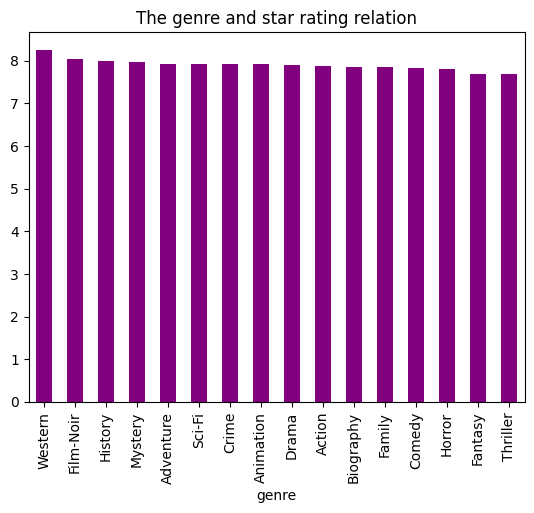

In [3]:
movies_df.groupby('genre')['star_rating'].mean().sort_values(ascending=False).plot(kind='bar', title='The genre and star rating relation' ,color= 'purple' )
plt.xlabel=('Genre')
plt.ylabel=('Star_rating')

In [4]:
movies_df.groupby('genre')['star_rating'].mean().sort_values(ascending=False)

genre
Western      8.255556
Film-Noir    8.033333
History      8.000000
Mystery      7.975000
Adventure    7.933333
Sci-Fi       7.920000
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Family       7.850000
Comedy       7.822436
Horror       7.806897
Fantasy      7.700000
Thriller     7.680000
Name: star_rating, dtype: float64

star_rating    Axes(0.125,0.11;0.775x0.77)
dtype: object

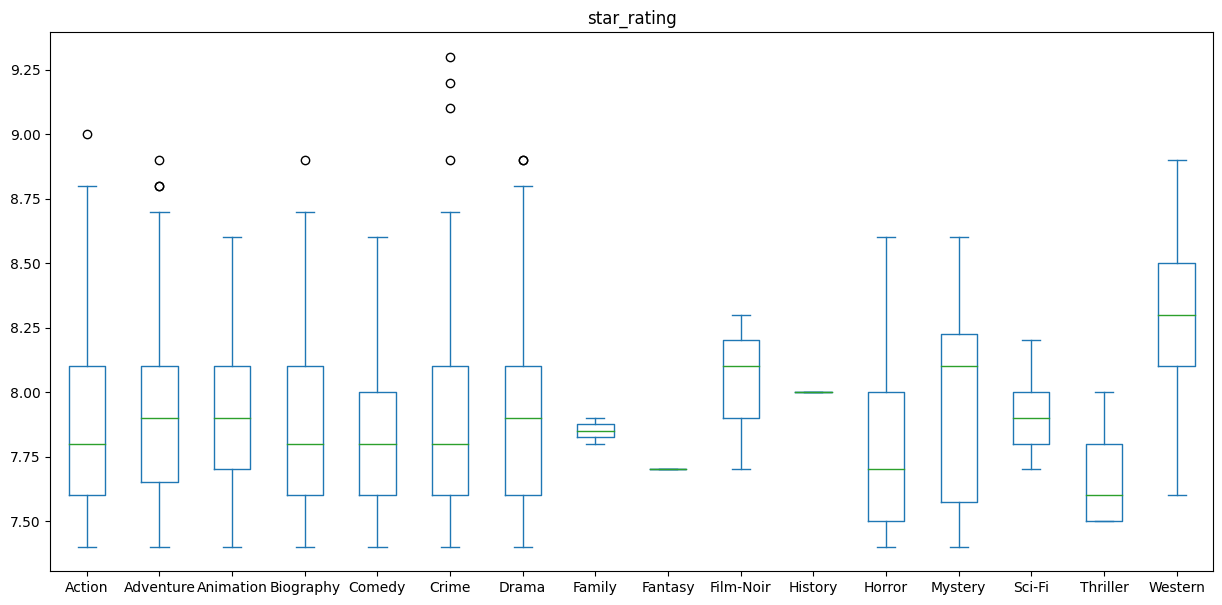

In [57]:
movies_df.plot(kind='box', column='star_rating', by='genre',figsize=(15.,7.))

Ο μέσος όρος των βαθμολογιών των ταινιών ανά είδος είναι πολύ κοντινός (μεταξύ των ειδών).Ξεχωρίζουν οι ταινίες Western που υπερβαίνουν τα 8 αστέρια(8.2) και τελευταίο είναι το είδος Thriller με 7.6 αστέρια.
Στο box , όμως, παρατηρούμε πως αν και κάποιες κατηγορίες κυμαίνονται κοντά βαθμολογικά, με ελάχιστα outliers, κατηγορίες όπως 'Family, History, Fantasy' δεν έχουν ποικιλία βαθμολογιών.
Από την άλλη, στη κατηγορία Western το 50% βρίσκεται βαθμολογικά αρκετά πιο υψηλά. Στην κατηγορία Crime παρατηρούμε 4 outliers. Φαίνεται το κάθε είδος επηρεάζε την βαθμολογία σε γενικές γραμμές και φαίνεται και από την κατηγορία Thriller η οποία βρίσκεται χαμηλά και δεν έχει ούτε outliers. Η κατηγορία Crime μπορεί να μην αποτελεί τη πρώτη βαθμολογικά, αλλά σε αυτήν εντάσσονται οι Top 3 ταινίες.
Συμπερασματικά, ναι σε μεγάλο κομμάτι σχετίζονται και ας υπάρχουν εξαιρέσεις.

2.Σχετίζεται η βαθμολογία (star_rating) με τον χαρακτηρισμό περιεχομένο(content_rating);





In [5]:
movies_df['content_rating'] = movies_df['content_rating'].replace(['X','TV-MA'],'NC-17')

In [6]:
print("X:", movies_df[movies_df['content_rating'] == 'Χ'])
print("TV-MA:", movies_df[movies_df['content_rating'] == 'TV-MA'])

X: Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []
TV-MA: Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []


In [7]:
movies_df.loc[[187,649],'content_rating'] = 'PG'
movies_df.loc[936,'content_rating'] = 'PG-13'

In [14]:
movies_df.groupby('content_rating')['star_rating'].mean().sort_values(ascending=False)

content_rating
PASSED       8.157143
NOT RATED    8.123077
APPROVED     8.027660
UNRATED      7.994737
G            7.990625
GP           7.933333
PG           7.880800
R            7.854783
PG-13        7.826316
NC-17        7.758333
Name: star_rating, dtype: float64

<Axes: xlabel='content_rating'>

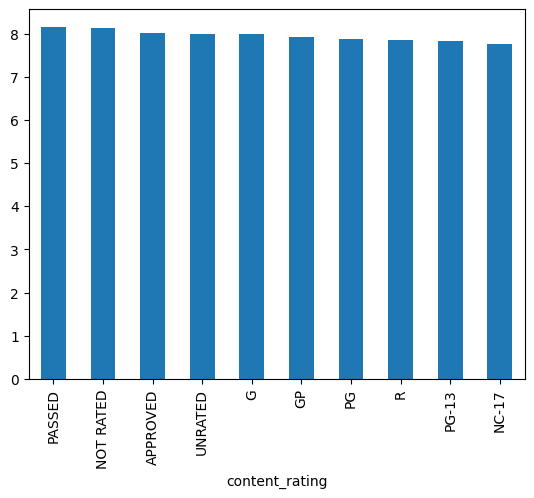

In [13]:
movies_df.groupby('content_rating')['star_rating'].mean().sort_values(ascending=False).plot(kind='bar')

star_rating    Axes(0.125,0.11;0.775x0.77)
dtype: object

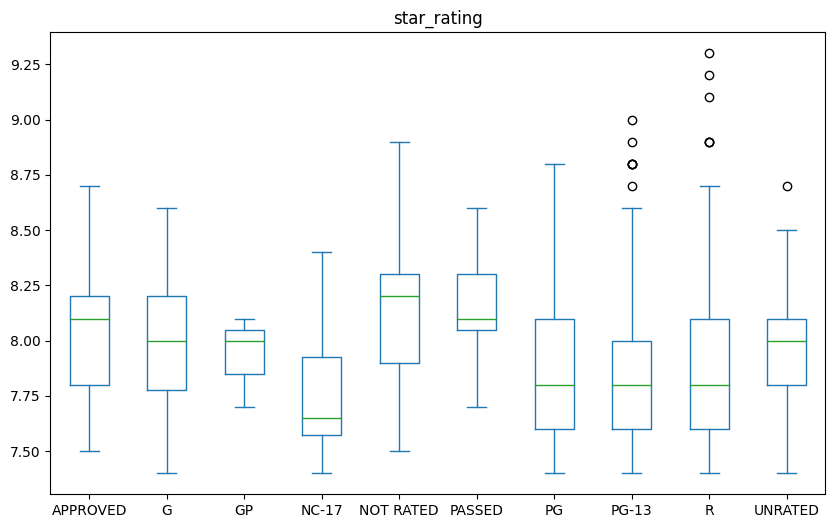

In [48]:
movies_df.plot(kind='box', column='star_rating', by='content_rating',figsize=(10.,6.))

Οι κατηγορίες R & PG-13  έχουν από 4 outliers.Οι υπόλοιπες κατηγορίες  κυμαίνονται στα δικά τους πλαίσια με κοντινό Μ.Ο. σχετικά, αλλά κάθε κατηγορία έχει τα δικά της δεδομένα και επηρεάζει την βαθμολογία.

3.Ποιος είναι ο μ.o. διάρκειας (average duration) των ταινιών σε κάθε είδος (genre)

In [93]:
movies_df.groupby('genre')['duration'].mean().sort_values(ascending=False)

genre
Western      136.666667
Adventure    134.840000
Biography    131.844156
Drama        126.539568
Action       126.485294
Crime        122.298387
Mystery      115.625000
Thriller     114.200000
Fantasy      112.000000
Sci-Fi       109.000000
Comedy       107.602564
Family       107.500000
Horror       102.517241
Film-Noir     97.333333
Animation     96.596774
History       66.000000
Name: duration, dtype: float64

<Axes: xlabel='genre'>

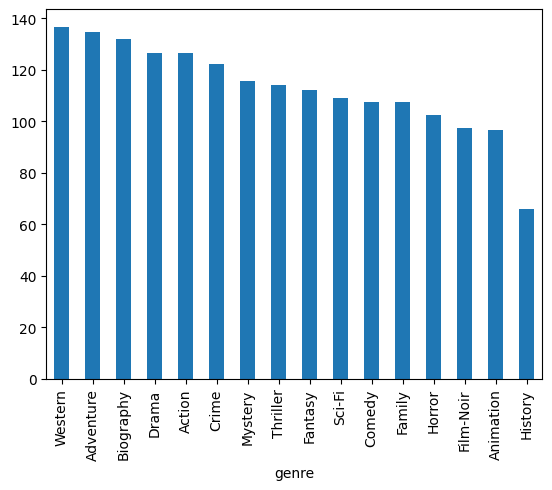

In [16]:
movies_df.groupby('genre')['duration'].mean().sort_values(ascending=False).plot(kind='bar')

4.Σχετίζεται η διάρκεια (duration) με το είδος (genre);

duration    Axes(0.125,0.11;0.775x0.77)
dtype: object

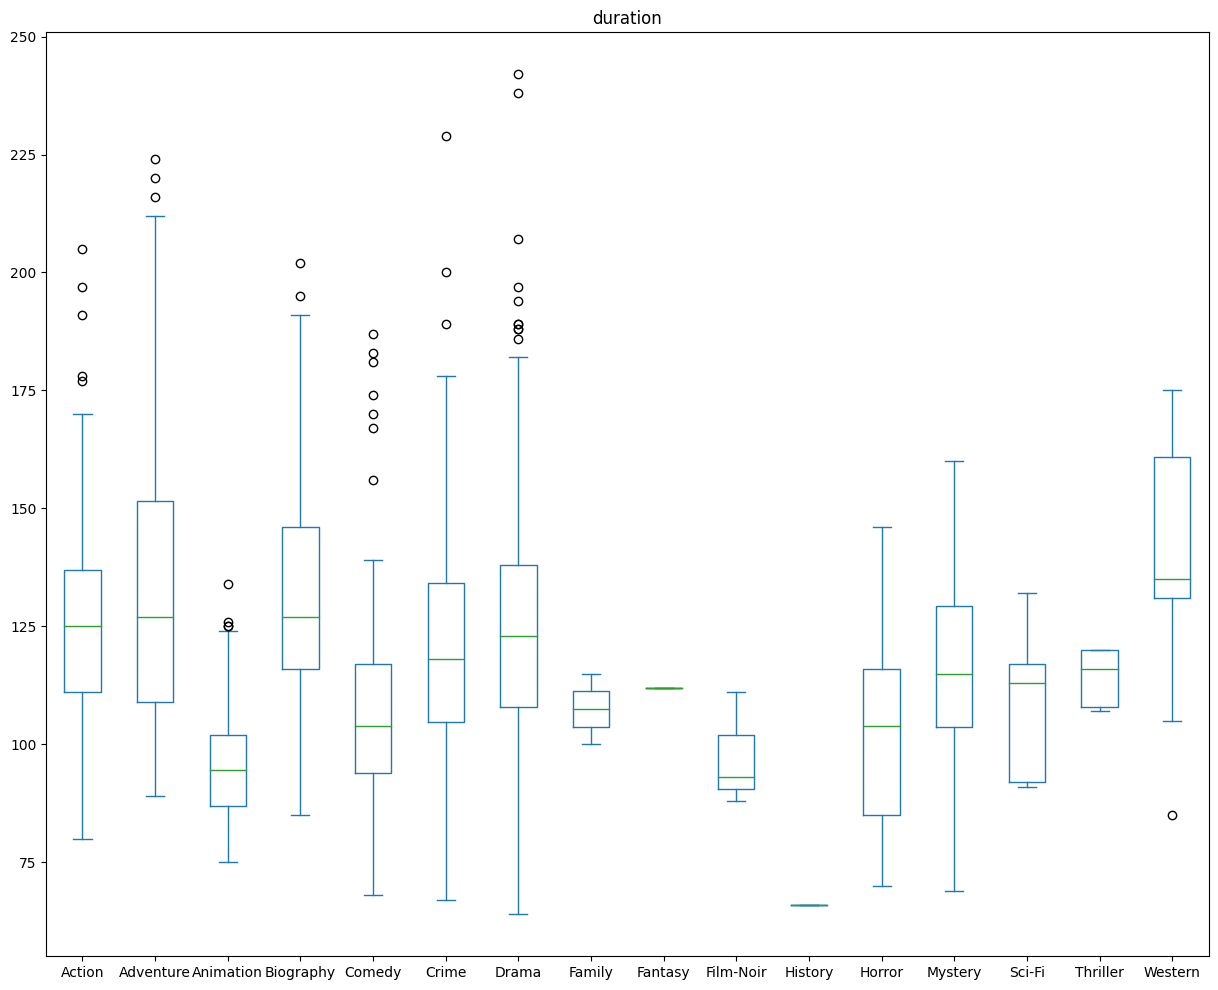

In [53]:
movies_df.plot(kind='box', column='duration', by='genre',figsize=(15.,12.))


Λόγω των πολλών outliers θα μπορούσαμε να πούμε πως σε κάποιες κατηγορίες όχι και σε κάποιες ναι, όπως τα Thriller, Family, Fantasy, Film-Noir,History.Για παράδειγνα οι ταινίες αυτές δεν ξεπερνούν τα 125 λεπτά.
Όπως και οι Western δεν συνηθίζουν να έχουν διάρκεις λιγότερη από 110 λεπτά, εκτός μίας απόκλισης. 

5.Ποιές είναι οι ασυνήθιστα μεγάλης διάρκειας ταινίες μέσα στις 1000 πρώτες του IMDB;



In [68]:
movies_df.sort_values('duration', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


6.Ποιός είναι ο μέσος όρος της διάρκειάς τους;

In [79]:
Dmean=movies_df.sort_values('duration', ascending=False).head()
Dmean['duration'].mean()

230.6

7.Επηρεάζει το ότι είναι τόσο μεγάλες στη διάρκεια την βαθμολογία τους;

In [81]:
Dmean['star_rating'].mean() #παρατηρούμε έχουν ικανοποιητική βαθμολογία

8.120000000000001

8.Ποιές και πόσες είναι οι ταινίες με κατηγορία Adventure που υπάρχουν στις Top 1000 ταινίες του IMDB;

In [82]:
movies_df[movies_df['genre'] == 'Adventure']
 #75 ταινίες

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


9.Ποια είναι η χαμηλότερη βαθμολογικά ταινία ανά είδος;

In [86]:
movies_df.sort_values('star_rating', ascending= False).groupby('genre',as_index=False).last()

,genre,star_rating,title,content_rating,duration,actors_list
0,Action,7.4,X-Men,PG-13,104,"[u'Patrick Stewart', u'Hugh Jackman', u'Ian Mc..."
1,Adventure,7.4,The Bucket List,PG-13,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
2,Animation,7.4,Alice in Wonderland,G,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
3,Biography,7.4,Man on the Moon,R,118,"[u'Jim Carrey', u'Danny DeVito', u'Gerry Becker']"
4,Comedy,7.4,Home Alone,PG,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
5,Crime,7.4,Wall Street,R,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."
6,Drama,7.4,Sleepy Hollow,R,105,"[u'Johnny Depp', u'Christina Ricci', u'Miranda..."
7,Family,7.8,Willy Wonka & the Chocolate Factory,G,100,"[u'Gene Wilder', u'Jack Albertson', u'Peter Os..."
8,Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
9,Film-Noir,7.7,Spellbound,UNRATED,111,"[u'Ingrid Bergman', u'Gregory Peck', u'Michael..."


10.Ποια είναι η χαμηλότερη σε διάρκεια ταινία ανά είδος;

In [88]:
movies_df.sort_values('duration', ascending= False).groupby('genre',as_index=False)[['genre','duration','title']].last()

,genre,duration,title
0,Action,80,Run Lola Run
1,Adventure,89,Stand by Me
2,Animation,75,Alice in Wonderland
3,Biography,85,Fruitvale Station
4,Comedy,68,The Kid
5,Crime,67,The Cabinet of Dr. Caligari
6,Drama,64,Freaks
7,Family,100,Willy Wonka & the Chocolate Factory
8,Fantasy,112,The City of Lost Children
9,Film-Noir,88,Laura


11.Ποιές είναι οι συυχνότητες βαθμολογίας των ταινιών;

<Axes: ylabel='Frequency'>

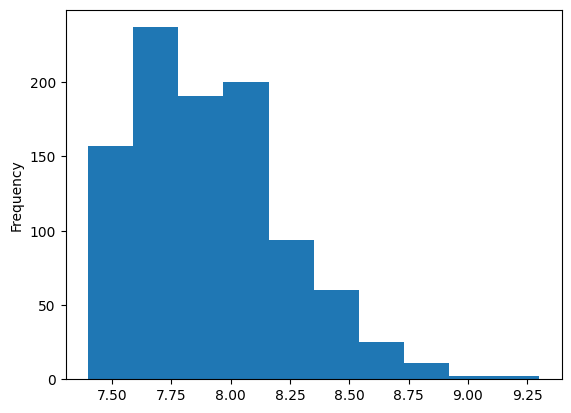

In [92]:
movies_df['star_rating'].plot(kind='hist', bins=10)

12.Πόσες ταινίες έχουν βαθμολογία 8.2;(51 ταινίες)
Από αυτές ποιός είναι ο Μ.Ο. διάρκειας;(121)
Πόσο διαρκεί η μεγαλύτερη και πόσο η μικρότερη(238 και 83)
Πόσες και ποιές από αυτές ανήκουν στην κατηγορία Crime;

In [108]:
movies_df[movies_df['star_rating']==8.2].describe()

,star_rating,duration
count,51.0,51.000000
mean,8.2,126.470588
std,0.0,30.526941
min,8.2,83.000000
25%,8.2,105.000000
50%,8.2,121.000000
75%,8.2,139.500000
max,8.2,238.000000


In [110]:
crimedf=movies_df[movies_df['star_rating']==8.2]
crimedf[crimedf['genre']=='Crime']

,star_rating,title,content_rating,genre,duration,actors_list
154,8.2,Cool Hand Luke,PG,Crime,126,"[u'Paul Newman', u'George Kennedy', u'Strother..."
169,8.2,The Maltese Falcon,NOT RATED,Crime,100,"[u'Humphrey Bogart', u'Mary Astor', u'Gladys G..."
171,8.2,Dial M for Murder,PG,Crime,105,"[u'Ray Milland', u'Grace Kelly', u'Robert Cumm..."
175,8.2,Touch of Evil,PG-13,Crime,95,"[u'Charlton Heston', u'Orson Welles', u'Janet ..."
176,8.2,Fargo,R,Crime,98,"[u'William H. Macy', u'Frances McDormand', u'S..."
178,8.2,The 400 Blows,NOT RATED,Crime,99,"[u'Jean-Pierre L\xe9aud', u'Albert R\xe9my', u..."
182,8.2,The Battle of Algiers,NOT RATED,Crime,121,"[u'Brahim Hadjadj', u'Jean Martin', u'Yacef Sa..."
